# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [3]:
df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

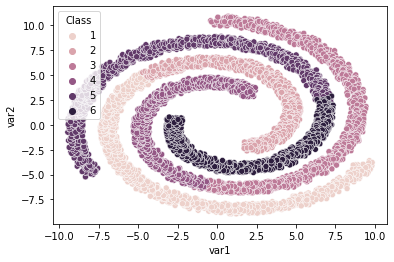

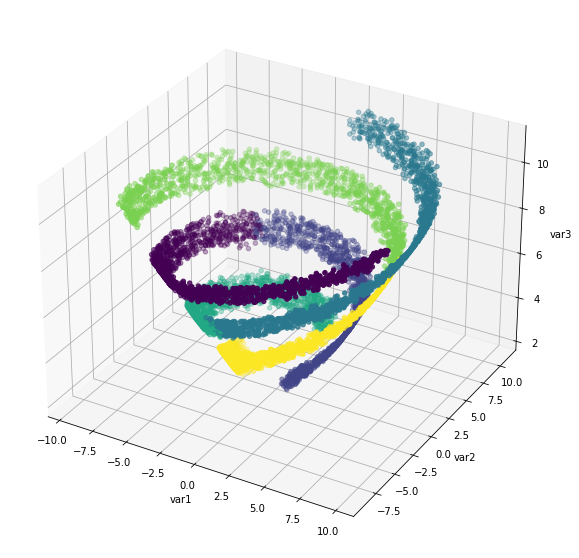

In [4]:
plot_2D(df,'var1', 'var2','Class')
plot_3D(df,'var1','var2','var3','Class')

In [5]:
df.head(5)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
0,0,9.4202,-4.3507,10.3764,0.66768,0.33387,0.33355,0.33399,0.33367,0.33391,1
1,1,9.7044,-4.4601,10.6803,0.66749,0.33360,0.33352,0.33345,0.33363,0.33395,1
2,2,9.8075,-4.0894,10.6259,0.66742,0.33347,0.33315,0.33301,0.33364,0.33364,1
3,3,9.2771,-4.0349,10.1166,0.66782,0.33322,0.33394,0.33379,0.33380,0.33391,1
4,4,9.6447,-3.5968,10.2936,0.66768,0.33391,0.33301,0.33306,0.33326,0.33329,1


### Project 1 Starts from here

#### Model 1: KMeans

##### EDA / Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    7500 non-null   int64  
 1   var1    7500 non-null   float64
 2   var2    7500 non-null   float64
 3   var3    7500 non-null   float64
 4   var4    7500 non-null   float64
 5   var5    7500 non-null   float64
 6   var6    7500 non-null   float64
 7   var7    7500 non-null   float64
 8   var8    7500 non-null   float64
 9   var9    7500 non-null   float64
 10  Class   7500 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 644.7 KB
None


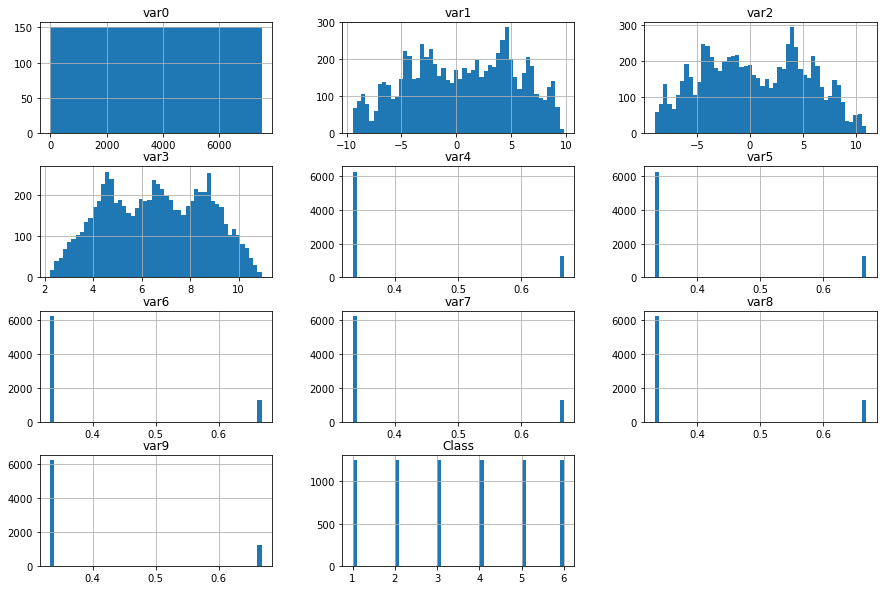

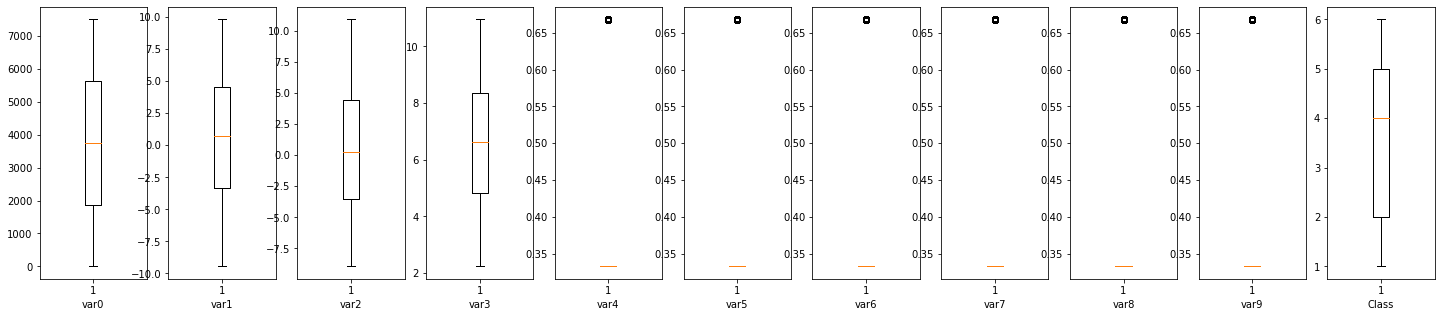

6    1251
2    1251
4    1251
3    1249
5    1249
1    1249
Name: Class, dtype: int64


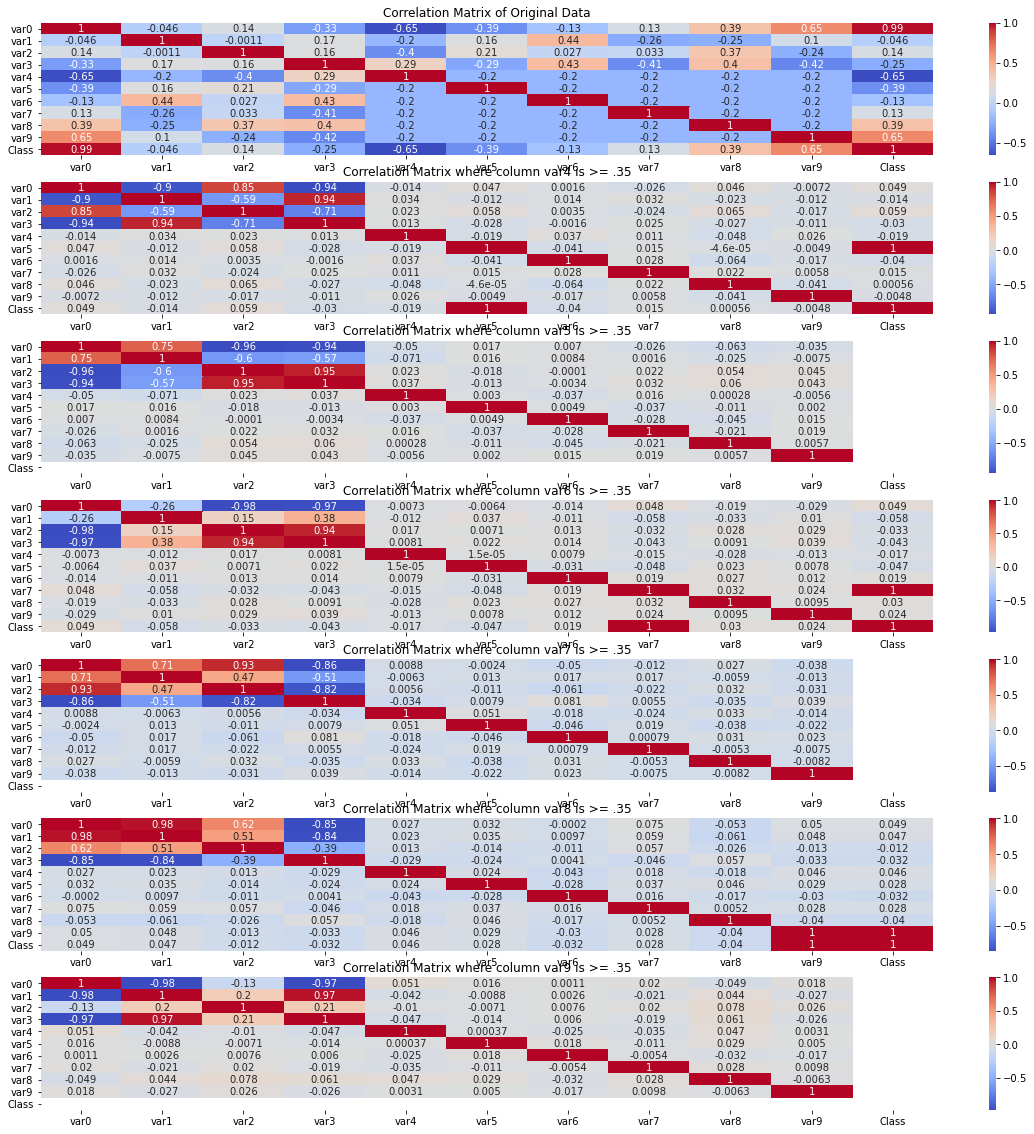

In [6]:
##### EDA / Preprocessing starts here
print(df.info())
df.hist(bins = 50, figsize = (15, 10))
plt.show()

fig, ax = plt.subplots(1, len(df.columns), figsize = (25, 5))
for idx, c in enumerate(df.columns):
    ax[idx].boxplot(df[c])
    ax[idx].set_xlabel(c)
plt.show()


fig, ax = plt.subplots(7, figsize = (20, 20))
ax[0].set_title('Correlation Matrix of Original Data')
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, ax = ax[0], cmap = 'coolwarm', xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot= True)

ax_num = 1
for num in range(4, 10):
    outliers_removed = df[df[f'var{num}'] >= .35]
    correlation_matrix_new = outliers_removed.corr() 
    sns.heatmap(correlation_matrix_new, ax = ax[ax_num], cmap = 'coolwarm', xticklabels = correlation_matrix_new.columns, yticklabels = correlation_matrix_new.columns, annot= True)
    ax[ax_num].set_title(f'Correlation Matrix where column var{num} is >= .35')
    ax_num += 1
print(df.Class.value_counts())

## EDA Notes
- columns `[var1, var2, var3]` have **_bi-modal distribution_**
- columns `[var4, var5, var6, var6, var8, var9]` contain values within a tight range
    - In each columns, value are never between .35 - .65
- There is an **equal** distribution in the Target variable - no need for balancing/sampling
    
- **Correlation between features + target (`Class`)**
    - `var0` is highly correlated (.99)
    - `var1` minimal correlation (-.046)
    - `var2` slightly correlated (.14)
    - `var3` moderately correlated (-.25)
    - `var4` highly correlated (-.65)
    - `var5` moderately correlated (-.39)
    - `var6` slightly correlated (-.13)
    - `var7` slightly correlated (.13)
    - `var8` moderately correlated (.39)
    - `var9` highly correlated (.65)

- **Correlation between features**
    - `var0` and `var3` are moderately correlated (-.33)
    - `var0` and `var4` are highly correlated (-.65)
    - `var0` and `var5` are moderately correlated (-.39)
    - `var0` and `var8` are moderately correlated (.39)
    - `var0` and `var9` are highly correlated (.65)
    - `var1` and `var6` are moderate-highly correlated (.44)
    - `var1` and `var7` are moderately correlated (-.26)
    - `var1` and `var8` are moderately correlated (-.25)
    - `var2` and `var4` are moderatley correlated (.44)
    - `var2` and `var8` are moderately correlated (.37)
    - `var2` and `var9` are moderately correlated (-.42)
    - `var3` and `var4` are moderately correlated (.29)
    - `var3` and `var5` are moderately correlated (-.29)
    - `var3` and `var6` are moderately-highly correlated (.43)
    - `var3` and `var7` are moderately-highly correlated (-.41)
    - `var3` and `var8` are moderately correlated (.4)
    - `var3` and `var9` are moderately correlated (-.42)
    - `[var5, var6, var7, var8, var9]` have equal correlation to each other (-.2)
- **Removing Outliers**
    - Based on the box plots, the only columns that contain outliers are `[var4, var5, var6, var7, var8, var9]`, with all outliers being above .35 
    - After removing rows where values are over .35 in these columns (independently), there was a negative impact on the correlation of the other features.  Thus, removing outliers is not a good direction.  If we run into an issue with these outliers, we can use **MinMaxScaler** to normalize the data.  
    
- **Feature Selection**
    - based on the correlation matrix, not all features `[var0, var1, var2, var3, var4, var5, var6, var7, var8, var9]` are useful
    - because we know some of these features are correlated with each other, we can reduce the features because: 
        - removed `var1` because it has almost no correlation with the target `Class` (-.046)
        - removed `var2` because it is moderately correlated with `var9` (-.42)
        - removed `var4` because it is highly correlated with `var0`
        - removed `var6` because it is moderately correlated with `var3` (.43) and is only slightly correlated with target (-.13)
        - removed `var7` because it is moderately correlated with `var3` (-.41) and is only slightly correlated with target (.13)
    - Looking at `var0`, we can see that it is not actually a column value but rather an index. For this reason, we will not use this column in our modeling.   
    - **Feature Columns 2** = `[var0, var3, var5, var8, var9]`

##### Model Implementation

In [7]:
feature_column = ['var0']
target_column = ['Class']
modeling_df = df[feature_column + target_column].copy()
X = df[feature_column].values
y = df[target_column].values

Fitting KMeans with k = 1 | Intertia = 35156249375.0
Fitting KMeans with k = 2 | Intertia = 8790021875.0
Fitting KMeans with k = 3 | Intertia = 3906863191.25
Fitting KMeans with k = 4 | Intertia = 2200467370.25
Fitting KMeans with k = 5 | Intertia = 1408161954.75
Fitting KMeans with k = 6 | Intertia = 979009036.25


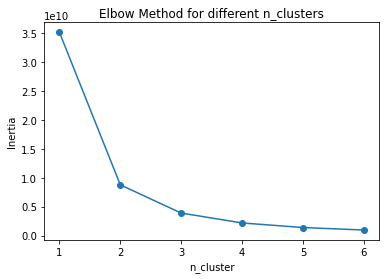

In [8]:
##### Model Implementation starts here
def elbow_method(features, k):
    inertia_values = []
    k_list = list(range(1, k+1))
    for i in k_list:
        k_mean = KMeans(n_clusters = i)
        k_mean.fit(features)
        inertia = k_mean.inertia_
        inertia_values.append(inertia)
        print(f'Fitting KMeans with k = {i} | Intertia = {inertia}')
        
    plt.plot(k_list, inertia_values, marker = 'o')
    plt.title('Elbow Method for different n_clusters')
    plt.xlabel(f'n_cluster')
    plt.ylabel(f'Inertia')
unique_targets = df.Class.unique()
elbow_method(X, len(unique_targets)) 

k_means = KMeans(n_clusters = len(unique_targets)) #we use the number of unique target classes so that we can map later on
labels = k_means.fit_predict(X)
modeling_df['k_means_predict'] = labels

#map the clusters to target value
unique_clusters = modeling_df.k_means_predict.unique()
cluster_map_dict = {}
for cluster in unique_clusters:
    subset_df = modeling_df[modeling_df.k_means_predict == cluster]
    target_counts = subset_df.Class.value_counts().sort_values(ascending = False)
    cluster_map_dict[cluster] = target_counts.index[0]
modeling_df['k_means_predict'] = modeling_df.k_means_predict.map(lambda x: cluster_map_dict[x]) #now k_cluster_mapped will correspond the target variable

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1249
           2       0.99      1.00      0.99      1251
           3       0.96      0.99      0.98      1249
           4       0.95      0.96      0.95      1251
           5       0.96      0.94      0.95      1249
           6       1.00      0.96      0.98      1251

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500

KMeans Clustering Accuracy = 0.9753333333333334


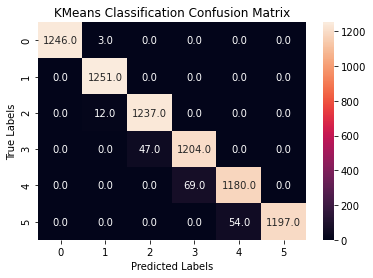

In [9]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_predicted_k_means = modeling_df.k_means_predict.values
print(classification_report(y, y_predicted_k_means))
k_means_accuracy = accuracy_score(y, y_predicted_k_means)
k_means_precision, k_means_recall, k_means_f1score,support = precision_recall_fscore_support(y, y_predicted_k_means, average='macro')
k_means_cm = confusion_matrix(y, y_predicted_k_means)
print(f'KMeans Clustering Accuracy = {k_means_accuracy}')
ax = plt.subplot()
sns.heatmap(k_means_cm, annot = True, fmt = '.1f', ax = ax)
ax.set_title('KMeans Classification Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

## Summary KMeans
- **Elbow Method**
    - This method is used to minimize the complexity of the model. 
    - Using this method, we found that `n_clusters = 4` is a good number that has low **_inertia_** and low algorithm complexity.  The elbow method is a graph that displays **_inertia_**, which is the sum of squared distances of each sample to their closest cluster.  The goal of using the elbow method is to find the lowest possible `n_cluster` that creates a low inertia value.  Because KMeans works by clustering points, we want each point to have a small distance from the center of the cluster.  Having `n_cluster` = 4 will minimize the inertia value while keeping the complexity of the algorithm relatively small.
    - HOWEVER, because we are using KMeans as a predictor model, we must use the same number of clusters as there are unique target classes.  We do this so that we can map each cluster to a target class.  
    - Therefore, we used `n_clusters = 6` because there are 6 target classes in the column `Class`.
    - After obtaining the cluster label for each row, we determine that max number of y_true labels within each cluster.  Each cluster will then be mapped to the y_true that was most common (see below code)
```
#map the clusters to target value
unique_clusters = cluster_df.k_cluster.unique()
cluster_map_dict = {}
for cluster in unique_clusters:
    subset_df = cluster_df[cluster_df.k_cluster == cluster]
    target_counts = subset_df.Class.value_counts().sort_values(ascending = False)
    cluster_map_dict[cluster] = target_counts.index[0]
cluster_df['k_cluster_mapped'] = cluster_df.k_cluster.map(lambda x: cluster_map_dict[x]) #now k_cluster_mapped will correspond the target variable
```
- **Results**
    - Using clustering gave almost perfect results on the train data.  
    - **_Accuracy_** = .966    $\frac{(TP + TN)}{(TP + FP + TN + FN)}$	
    - **_F1-Score_** = .97 $\frac{2 * Precision * Recall}{(Precision + Recall)}$
        - class1 = .97
        - class2 = .94
        - class3 = .94 
        - class4 = .96
        
        - class5 = .99
        - class6 = 1.0
    - **_Precision_** = .97 $\frac{TP}{(TP + FP)}$
        - class1 = .95
        - class2 = .93
        - class3 = .95 
        - class4 = .98
        - class5 = .99
        - class6 = 1.0
    - **_Recall_** = .97    $\frac{TP}{(TP + FN)}$
        - class1 = 1.0
        - class2 = .95
        - class3 = .93 
        - class4 = .95
        - class5 = .98
        - class6 = .99

#### Model 2: KNN

##### EDA / Preprocessing

In [10]:
##### EDA / Preprocessing starts here

##### Model Implementation

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1249
           2       1.00      1.00      1.00      1251
           3       1.00      1.00      1.00      1249
           4       1.00      1.00      1.00      1251
           5       1.00      1.00      1.00      1249
           6       1.00      1.00      1.00      1251

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Neighbors = 1 | KNN Accuracy = 1.0


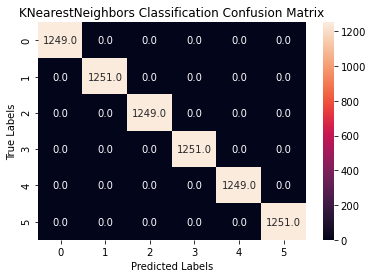

In [11]:
##### Model Implementation starts here
def choose_n_neighbors(X, y, max_neighbors = 3):
    best_accuracy = 0
    best_n = 0
    for neighbor in range(1, max_neighbors + 1): 
        knn = KNeighborsClassifier(n_neighbors = neighbor)
        knn.fit(X,y.ravel())
        predictions = knn.predict(X)
        accuracy = accuracy_score(y, predictions)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n = neighbor
        print(f'Neighbors = {neighbor} | Accuracy = {accuracy:.2f}', end = '\r')
    knn = KNeighborsClassifier(n_neighbors = best_n)
    knn.fit(X, y.ravel())
    return knn, best_n
knn, n_neighbors = choose_n_neighbors(X, y)
modeling_df['knn_predict'] = knn.predict(X)
predicted_knn = modeling_df.knn_predict.values
print(classification_report(y, predicted_knn))
knn_accuracy = accuracy_score(y, predicted_knn)
knn_precision, knn_recall, knn_f1score,support = precision_recall_fscore_support(y, predicted_knn, average='macro')
knn_cm = confusion_matrix(y, predicted_knn)
print(f'Neighbors = {n_neighbors} | KNN Accuracy = {knn_accuracy}')

ax = plt.subplot()
sns.heatmap(knn_cm, annot = True, fmt = '.1f', ax = ax)
ax.set_title('KNearestNeighbors Classification Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()
# print(f'Neighbors = {n_neighbors}')


#### Summary:
- To determine the best `n_neighbors` parameters, we used the function `choose_n_neighbors(X, y, max_neighbors = 3)` which iterated through a list of parameters and tested each ones accuracy.  We found that n_neighbors = 1 was best, and increasing the number had no effect as each neighbor resulted in an accuracy of 100%
- **Results**
    - Using clustering gave perfect results on the train data.  
    - **_Accuracy_** = 1.0    $\frac{(TP + TN)}{(TP + FP + TN + FN)}$	
    - **_F1-Score_** = 1.0 $\frac{2 * Precision * Recall}{(Precision + Recall)}$
        - 1.0 across all classes
    - **_Precision_** = 1.0 $\frac{TP}{(TP + FP)}$
        - 1.0 across all classes
    - **_Recall_** = 1.0    $\frac{TP}{(TP + FN)}$
        - 1.0 across all classes


#### Model 3: Logistic Regression

##### EDA / Preprocessing

In [12]:
##### EDA / Preprocessing starts here

##### Model Implementation

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1249
           2       1.00      1.00      1.00      1251
           3       1.00      1.00      1.00      1249
           4       1.00      1.00      1.00      1251
           5       1.00      1.00      1.00      1249
           6       1.00      1.00      1.00      1251

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Logistic Regression Accuracy = 1.0


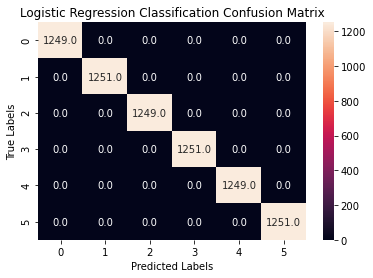

In [13]:
##### Model Implementation starts here

log = LogisticRegression()
log.fit(X, y.ravel())
log_predict = log.predict(X)
modeling_df['log_predict'] = log_predict

print(classification_report(y, log_predict))
log_accuracy = accuracy_score(y, log_predict)
log_precision, log_recall, log_f1score,support = precision_recall_fscore_support(y, log_predict, average='macro')
log_cm = confusion_matrix(y, log_predict)
print(f'Logistic Regression Accuracy = {log_accuracy}')

ax = plt.subplot()
sns.heatmap(log_cm, annot = True, fmt = '.1f', ax = ax)
ax.set_title('Logistic Regression Classification Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

##### Summary:
- **Results**
    - Using logistic regression gave perfect results on the train data  
    - **_Accuracy_** = 1.0    $\frac{(TP + TN)}{(TP + FP + TN + FN)}$	
    - **_F1-Score_** = 1.0 $\frac{2 * Precision * Recall}{(Precision + Recall)}$
        - 1.0 across all classes
    - **_Precision_** = 1.0 $\frac{TP}{(TP + FP)}$
        - 1.0 across all classes
    - **_Recall_** = 1.0    $\frac{TP}{(TP + FN)}$
        - 1.0 across all classes

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

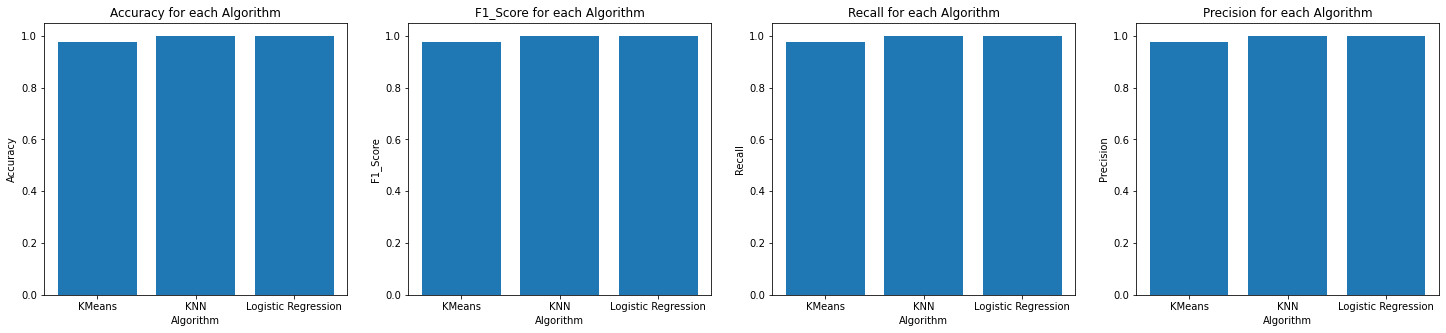

,Model,Algorithm,Number of Features,Accuracy,F1_Score,Recall,Precision
0,0,KMeans,1,98%,98%,98%,98%
1,1,KNN,1,100%,100%,100%,100%
2,2,Logistic Regression,1,100%,100%,100%,100%


In [15]:
df_dict = {'Model': [0,1,2], 'Algorithm':['KMeans','KNN','Logistic Regression'],'Number of Features': [1, 1, 1],
           'Accuracy':[k_means_accuracy, knn_accuracy, log_accuracy], 
          'F1_Score': [k_means_f1score, knn_f1score, log_f1score], 
          'Recall': [k_means_recall, knn_recall, log_recall], 
          'Precision': [k_means_precision, knn_precision, log_precision]}

result_df = pd.DataFrame(df_dict,index = [i for i in df_dict['Model']])
# df_dict['AccuracyPercent'] = Result1.Accuracy.map(lambda x: f'{x*100:.0f}%')

fig, ax = plt.subplots(1, 4, figsize = (25, 5))
x_bar = result_df.Algorithm.values
columns_to_viz = ['Accuracy', 'F1_Score', 'Recall', 'Precision']
percent_df = result_df.copy()
for idx, c in enumerate(columns_to_viz):
    ax[idx].bar(x_bar, result_df[c].values)
    ax[idx].set_title(f'{c} for each Algorithm')
    ax[idx].set_xlabel('Algorithm')
    ax[idx].set_ylabel(c)
    percent_df[c] = percent_df[c].map(lambda x: f'{x * 100:.0f}%')
plt.show()
percent_df

In [16]:
modeling_df.head()

,var0,Class,k_means_predict,knn_predict,log_predict
0,0,1,1,1,1
1,1,1,1,1,1
2,2,1,1,1,1
3,3,1,1,1,1
4,4,1,1,1,1
